# Coronavirus Brasil - Gráficos estáticos
> Gráficos e análises dos estados brasileiros

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]



In [0]:
#hide
# Imports
import warnings
warnings.filterwarnings('ignore')
import gzip
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('dark')

In [76]:
#hide
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#hide
# Abrir pasta com os arquivos
%cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
!rm '/content/drive/My Drive/CoronaVirus Brasil/caso.csv.gz'

In [0]:
#hide
# Parameters
BOLETIM = 'https://data.brasil.io/dataset/covid19/boletim.csv.gz'
CASOS = 'https://data.brasil.io/dataset/covid19/caso.csv.gz'

In [0]:
#hide
# Functions
def sigla_nome(x):
    return dic[x]

def populacao(x):
    return popu[x]

In [80]:
#hide
# Execution
!wget {CASOS}

--2020-03-31 11:06:28--  https://data.brasil.io/dataset/covid19/caso.csv.gz
Resolving data.brasil.io (data.brasil.io)... 192.99.5.40
Connecting to data.brasil.io (data.brasil.io)|192.99.5.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32202 (31K) [application/gzip]
Saving to: ‘caso.csv.gz’

caso.csv.gz         100%[===================>]  31.45K  --.-KB/s    in 0.001s  

2020-03-31 11:06:28 (50.1 MB/s) - ‘caso.csv.gz’ saved [32202/32202]



In [8]:
#hide
#manipulating datetime
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

'2020-03-30'

In [0]:

#hide
with gzip.open('caso.csv.gz', 'rb') as f_in:
    with open('caso.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [82]:
#hide
ls

2020-MES-DIA-corona-mundo-estatico.ipynb   Brasil.ipynb  dados.csv
ANO-MES-DIA-corona-mundo-interativo.ipynb  caso.csv      graficovid/
brasil-io-dados-estado.ipynb               caso.csv.gz   plots/


In [0]:
#hide
#dictionaries
casos = pd.read_csv('caso.csv')
dic = {'AC': "Acre",  'AL': "Alagoas",  'AM': "Amapá", 'AP': "Amazonas", 'BA': "Bahia", 'CE': "Ceará", 'DF': "Distrito Federal",'ES': "Espírito Santo",'GO': "Goiás",'MA': "Maranhão",'MG': "Minas Gerais",'MS': "Mato Grosso do Sul",'MT': "Mato Grosso",'PA': "Pará",'PB': "Paraíba",'PE': "Pernambuco",'PI': "Piauí",'PR': "Paraná",'RJ': "Rio de Janeiro",'RN': "Rio Grande do Norte",'RO': "Rondônia",'RR': "Roraima",'RS': "Rio Grande do Sul",'SC': "Santa Catarina",'SE': "Sergipe",'SP': "São Paulo",'TO': "Tocantins"} 
popu ={'AC': 881935,'AL': 3337357,'AM': 4144597,'AP': 845731,'BA': 14873064,'CE': 9132078,'DF': 3015268,'ES': 4018650,'GO': 7018354,'MA': 7075181,'MG': 21168791,'MS': 2778986,'MT': 3484466,'PA': 8602865,'PB': 4018127,'PE': 9557071,'PI': 3273227,'PR': 11433957,'RJ': 17264943,'RN': 3506853,'RO': 1777225,'RR': 605761,'RS': 11377239,'SC': 7164788,'SE': 2298696,'SP': 45919049,'TO': 1572866}

In [0]:
#hide
#casos.set_index('date',inplace=True)


In [84]:
#hide
casos

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-03-30,AC,NaN,state,41,0.0,14,True,881935.0,12.0,4.64887,NaN
1,2020-03-29,AC,NaN,state,34,0.0,13,False,881935.0,12.0,3.85516,NaN
2,2020-03-28,AC,NaN,state,25,0.0,12,False,881935.0,12.0,2.83468,NaN
3,2020-03-27,AC,NaN,state,25,0.0,11,False,881935.0,12.0,2.83468,NaN
4,2020-03-26,AC,NaN,state,23,0.0,10,False,881935.0,12.0,2.60790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3136,2020-03-29,AL,Porto Real do Colégio,city,1,0.0,5,False,20066.0,2707503.0,4.98355,NaN
3137,2020-03-28,AL,Porto Real do Colégio,city,1,0.0,4,False,20066.0,2707503.0,4.98355,NaN
3138,2020-03-27,AL,Porto Real do Colégio,city,1,0.0,3,False,20066.0,2707503.0,4.98355,NaN
3139,2020-03-26,AL,Porto Real do Colégio,city,1,0.0,2,False,20066.0,2707503.0,4.98355,NaN


In [85]:
#hide
y = casos[casos.duplicated()]
y

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate


In [86]:
#hide
casos_por_estado = casos.groupby(['state','date']).sum()[['confirmed', 'deaths']]
casos_por_estado

confirmed  deaths
state date                         
AC    2020-03-17          6     0.0
      2020-03-18          6     0.0
      2020-03-19          8     0.0
      2020-03-20         14     0.0
      2020-03-21         22     0.0
...                     ...     ...
TO    2020-03-26         16     0.0
      2020-03-27         18     0.0
      2020-03-28         18     0.0
      2020-03-29         20     0.0
      2020-03-30         22     0.0

[442 rows x 2 columns]

In [87]:
#hide
casos_por_estado = casos_por_estado.reset_index(level=[0,1])
casos_por_estado.tail(5)

,state,date,confirmed,deaths
437,TO,2020-03-26,16,0.0
438,TO,2020-03-27,18,0.0
439,TO,2020-03-28,18,0.0
440,TO,2020-03-29,20,0.0
441,TO,2020-03-30,22,0.0


In [88]:
#hide
x = casos_por_estado[casos_por_estado.duplicated()]
x

,state,date,confirmed,deaths


In [89]:
#hide
#casos_por_estado.set_index('date',inplace=True)
casos_por_estado.tail(5)

,state,date,confirmed,deaths
437,TO,2020-03-26,16,0.0
438,TO,2020-03-27,18,0.0
439,TO,2020-03-28,18,0.0
440,TO,2020-03-29,20,0.0
441,TO,2020-03-30,22,0.0


In [90]:
#hide
# adding a relative approach column
casos_por_estado['população']=casos_por_estado['state']
casos_por_estado['população'] = casos_por_estado['população'].apply(populacao)
casos_por_estado['Relativa'] = 10000*(casos_por_estado['confirmed']/casos_por_estado['população']) #a cada 10 mil
casos_por_estado.tail(5)

,state,date,confirmed,deaths,população,Relativa
437,TO,2020-03-26,16,0.0,1572866,0.101725
438,TO,2020-03-27,18,0.0,1572866,0.114441
439,TO,2020-03-28,18,0.0,1572866,0.114441
440,TO,2020-03-29,20,0.0,1572866,0.127156
441,TO,2020-03-30,22,0.0,1572866,0.139872


In [91]:
#hide
casos_por_estado[casos_por_estado['state']=='SP'].tail(5)

,state,date,confirmed,deaths,população,Relativa
425,SP,2020-03-26,2105,116.0,45919049,0.458415
426,SP,2020-03-27,2446,136.0,45919049,0.532677
427,SP,2020-03-28,1406,84.0,45919049,0.306191
428,SP,2020-03-29,1451,98.0,45919049,0.315991
429,SP,2020-03-30,3034,226.0,45919049,0.660728


In [0]:
#hide

# Generalizando para um loop
#plt.figure(figsize=(16, 8))
#lista_estados = casos_por_estado['state'].unique()
#
#for estado in lista_estados:
#    confirmed = casos_por_estado[casos_por_estado['state']==estado][['date', 'confirmed']]
#    confirmed['date'] = pd.to_datetime(confirmed['date'])
#    plt.plot(confirmed['date'], confirmed['confirmed'], label=estado)
#
#plt.legend()


In [92]:
#hide
# Change states` names
casos_por_estado['state'] = casos_por_estado['state'].apply(sigla_nome)
casos_por_estado.tail()

,state,date,confirmed,deaths,população,Relativa
437,Tocantins,2020-03-26,16,0.0,1572866,0.101725
438,Tocantins,2020-03-27,18,0.0,1572866,0.114441
439,Tocantins,2020-03-28,18,0.0,1572866,0.114441
440,Tocantins,2020-03-29,20,0.0,1572866,0.127156
441,Tocantins,2020-03-30,22,0.0,1572866,0.139872


In [93]:
#hide
#beggining on march 5
casos_por_estado['date'] = pd.to_datetime(casos_por_estado['date']) 
casos_mar5 = casos_por_estado[casos_por_estado['date']>='2020-03-15']
casos_mar5.head()


,state,date,confirmed,deaths,população,Relativa
0,Acre,2020-03-17,6,0.0,881935,0.068032
1,Acre,2020-03-18,6,0.0,881935,0.068032
2,Acre,2020-03-19,8,0.0,881935,0.090710
3,Acre,2020-03-20,14,0.0,881935,0.158742
4,Acre,2020-03-21,22,0.0,881935,0.249451


In [94]:
#hide
#interactive plot (attempt)
import plotly.express as px
fig = px.line(casos_mar5, x="date",y='confirmed',color='state',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros",)    
fig.show()

<center> <h2> Gráficos de contaminação </h2> </center>


In [0]:
#hide
casos_mar5.sort_values('confirmed',ascending=False,inplace=True)
hue1 = casos_mar5['state'].unique()

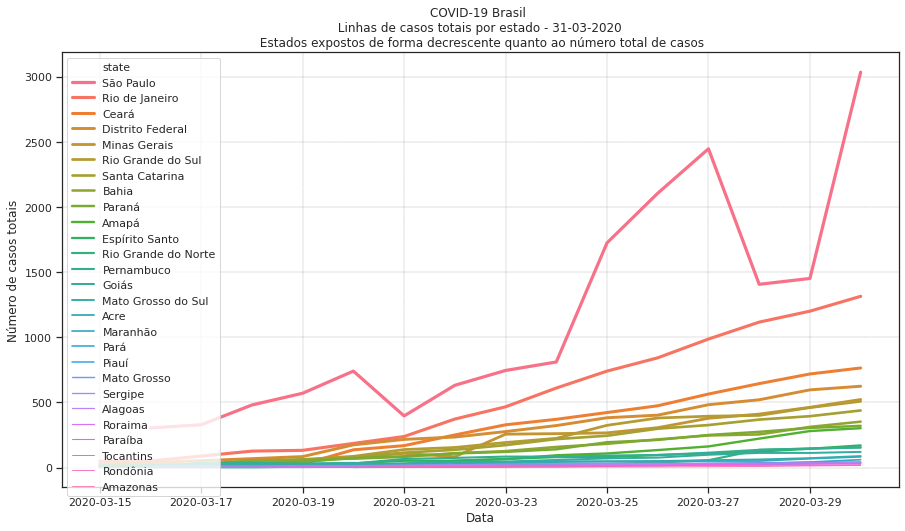

In [96]:
#hide_input

#absolute approach line plot
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='confirmed',data=casos_mar5,hue='state',size="state",hue_order=hue1)
plt.title('COVID-19 Brasil \n Linhas de casos totais por estado - {} \n Estados expostos de forma decrescente quanto ao número total de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Número de casos totais')
plt.savefig("plots/15_curvas_brasileiras.png")


In [0]:
#hide
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
hue = casos_mar5['state'].unique()

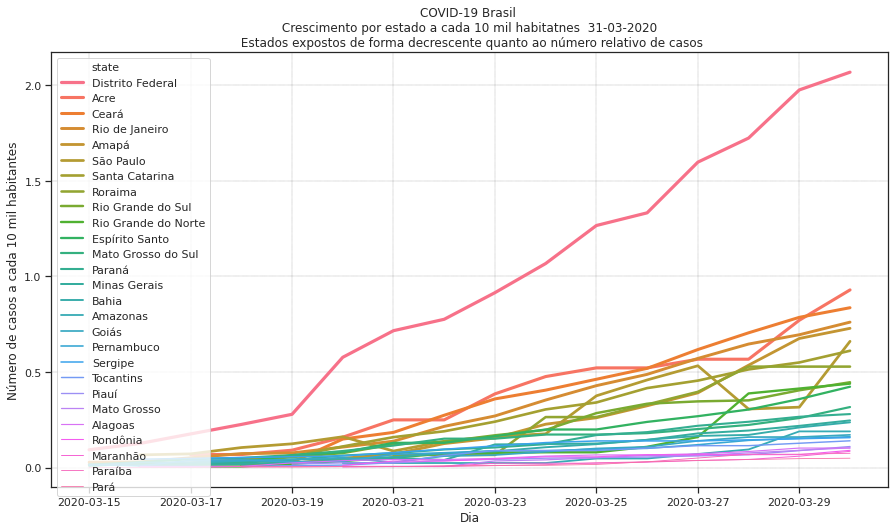

In [98]:
#hide_input

#Relativa approach line plot
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='Relativa',data=casos_mar5,hue='state',size="state",hue_order=hue)
plt.title('COVID-19 Brasil \n Crescimento por estado a cada 10 mil habitatnes  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

In [99]:
#hide

#Relative approach line plot (interactive)
casos_mar5.sort_values(by=['state','date'])
import plotly.express as px
fig = px.line(casos_mar5, x="date",y='Relativa',color='state',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros",)    
fig.show()

In [100]:
#hide
df_last = casos_mar5.groupby('state').max()[['date','confirmed','deaths','Relativa']]
df_last = df_last.reset_index()
df_last.tail(3)

,state,date,confirmed,deaths,Relativa
24,Sergipe,2020-03-30,36,0.0,0.156611
25,São Paulo,2020-03-30,3034,226.0,0.660728
26,Tocantins,2020-03-30,22,0.0,0.139872


In [0]:
#hide
#dropping DF
df_last_semdf = df_last[df_last['state']!='Distrito Federal']

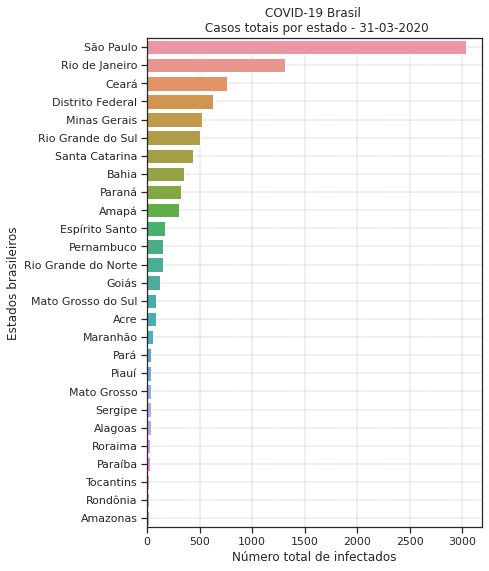

In [103]:
#hide_input
# absolute approach bar plot
df_last.sort_values('confirmed',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['confirmed'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de infectados')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

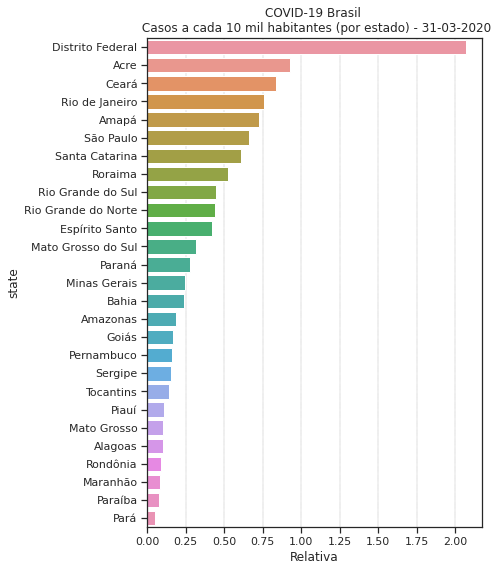

In [104]:
#hide_input

# relative approach bar plot

df_last.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado) - {}'.format(today))
plt.ylabel('Estados brasileiros')
plt.xlabel('Infectados a cada 10 mil habitantes')
sns.barplot(df_last['Relativa'],df_last['state'],orient="h")

plt.savefig('plots/13_brasil_relativo',bbox_inches = 'tight')

In [0]:
#hide
df_last_semdf.sort_values('Relativa',ascending=False,inplace=True)


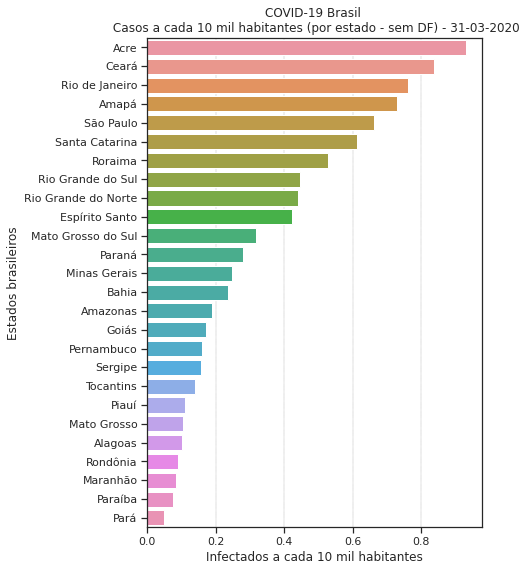

In [106]:
#hide_input

# relative approach bar plot (without DF)

plt.figure(figsize=(6,9))
plt.grid(color='black', linestyle='--', linewidth=0.17)
sns.barplot(df_last_semdf['Relativa'],df_last_semdf['state'],orient="h")

plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado - sem DF) - {}'.format(today))
plt.ylabel('Estados brasileiros')
plt.xlabel('Infectados a cada 10 mil habitantes')
plt.savefig('plots/14_brasil_relativo_sem_df',bbox_inches = 'tight')

In [0]:
#hide
#plt.figure(figsize=(15,8))
#sns.lineplot(x='date',y='confirmed',data=x)
#plt.title('COVID-19 - Crescimento {}(relativo)- {}'.format(y,today))
#texto1 = 'Quarentena'
#plt.text('2020-03-24',125,texto1,fontsize=12)
#
#plt.grid(color='black', linestyle='--', linewidth=0.17)


In [0]:
#hide
# exporting xlsx to concat with up to date data
#df_last1 = casos_mar5
#df_last1.columns = ['Estado', 'Dia','Casos','Mortes','População','Relativa']
#df_last1 = df_last1.reindex(columns=['Dia','Casos','Estado','Mortes','População','Relativa'])
#df2 = df_last1[df_last1['Dia']<'2020-03-25']
#df2.tail(3)

In [0]:
#hide
#df2.to_excel('graficovid/Tabela_brasil_até_25.xlsx',index=False)

In [109]:
#hide
casos_mar5.columns

Index(['state', 'date', 'confirmed', 'deaths', 'população', 'Relativa'], dtype='object')

In [0]:
#hide
casos_mar5.columns = ['Estado', 'Dia', 'Casos', 'Mortes', 'população', 'Relativa']

In [0]:
#hide
sul = casos_mar5[(casos_mar5['Estado']=='Paraná') | (casos_mar5['Estado']=='Santa Catarina') | (casos_mar5['Estado']=='Rio Grande do Sul')]

In [0]:
#hide
sudeste = casos_mar5[(casos_mar5['Estado']=='São Paulo') | (casos_mar5['Estado']=='Minas Gerais') | (casos_mar5['Estado']=='Rio de Janeiro') | (casos_mar5['Estado']=='Espírito Santo ')]

In [0]:
#hide
centroeste =  casos_mar5[(casos_mar5['Estado']=='Goiás') | (casos_mar5['Estado']=='Mato Grosso') | (casos_mar5['Estado']=='Mato Grosso do Sul')]

In [0]:
#hide
norte = casos_mar5[(casos_mar5['Estado']=='Acre') | (casos_mar5['Estado']=='Amapá') | (casos_mar5['Estado']=='Amazonas') | (casos_mar5['Estado']=='Pará') | (casos_mar5['Estado']=='Rondônia')| (casos_mar5['Estado']=='Roraima')| (casos_mar5['Estado']=='Tocantins')]

In [0]:
#hide
nordeste = casos_mar5[(casos_mar5['Estado']=='Alagoas') | (casos_mar5['Estado']=='Bahia') | (casos_mar5['Estado']=='Ceará') | (casos_mar5['Estado']=='Maranhão') | (casos_mar5['Estado']=='Paraíba')| (casos_mar5['Estado']=='Pernambuco')| (casos_mar5['Estado']=='Piauí')| (casos_mar5['Estado']=='Rio Grande do Norte')| (casos_mar5['Estado']=='Piauí')]

<center> <h2> Curvas de contaminação por estado </h2> </center>


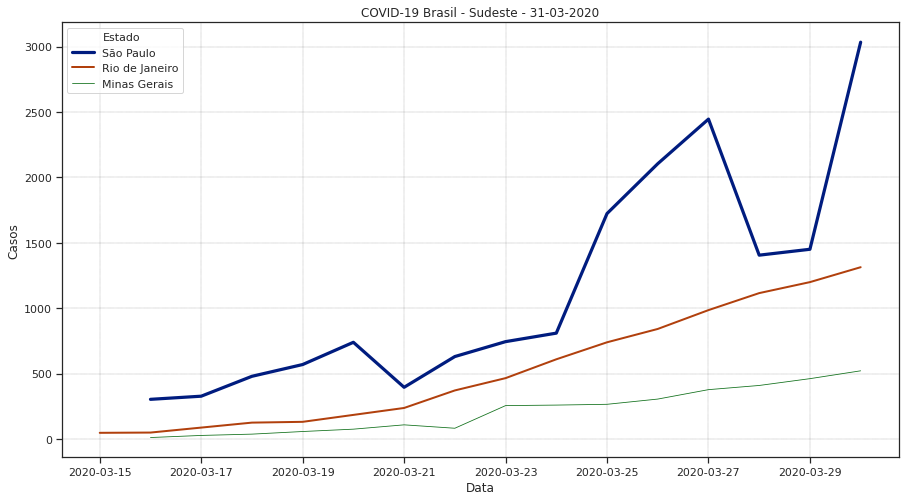

In [118]:
#hide_input
#Sudeste absoluta
sudeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sudeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

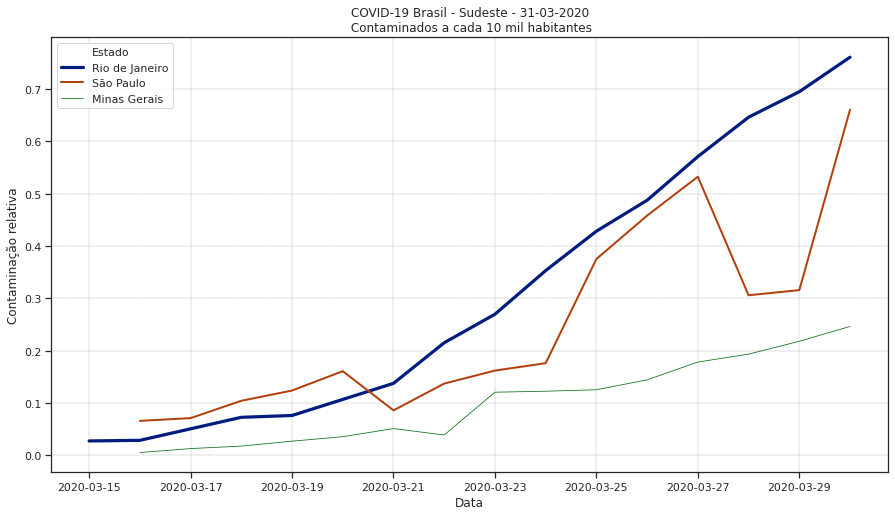

In [119]:
#hide_input
#sudeste relativa
sudeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sudeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/19_sudeste_relativa.png",bbox_inches = 'tight')

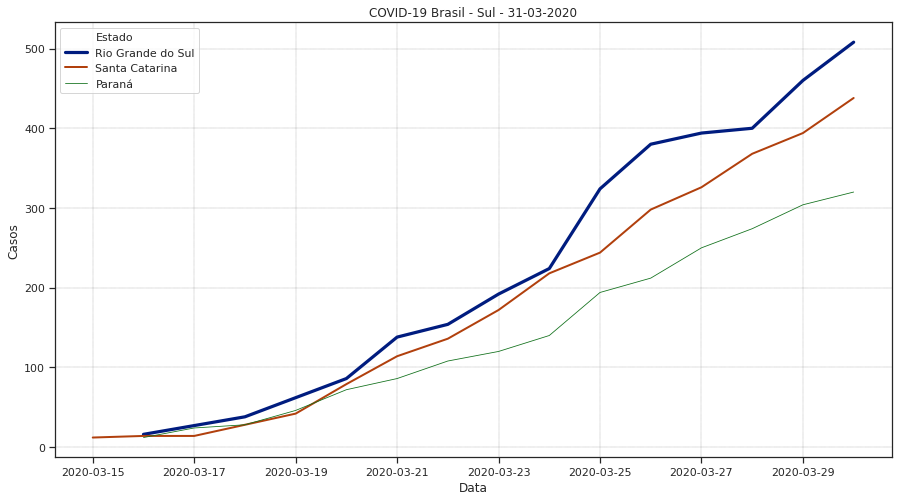

In [120]:
#hide_input
#sul absoluta
sul.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sul - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/20_sul_absoluta.png",bbox_inches = 'tight')

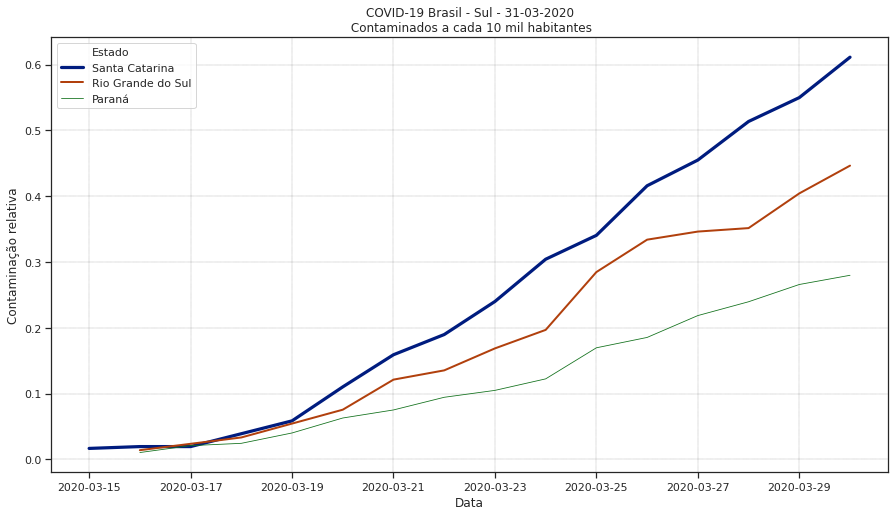

In [121]:
#hide_input
#sul relativa
sul.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sul - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/21_sul_relativa.png",bbox_inches = 'tight')

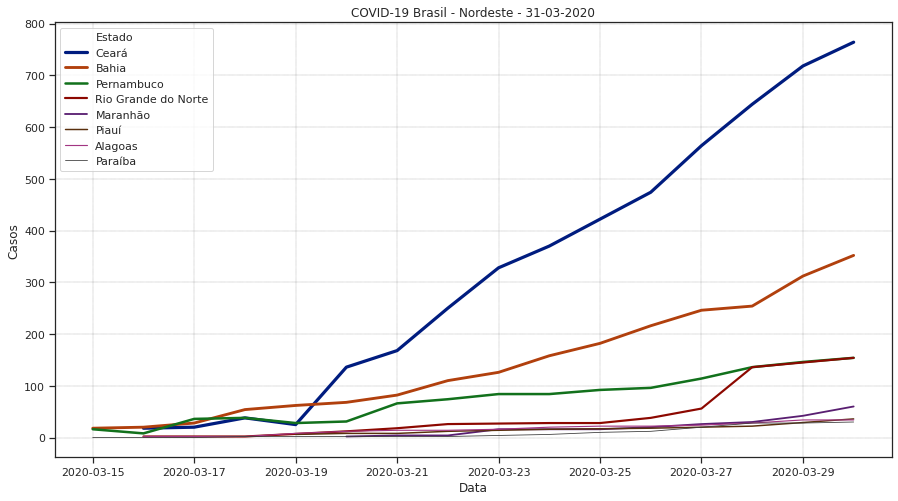

In [122]:
#hide_input
#nordeste absoluta
nordeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Nordeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/22_nordeste_absoluta.png",bbox_inches = 'tight')

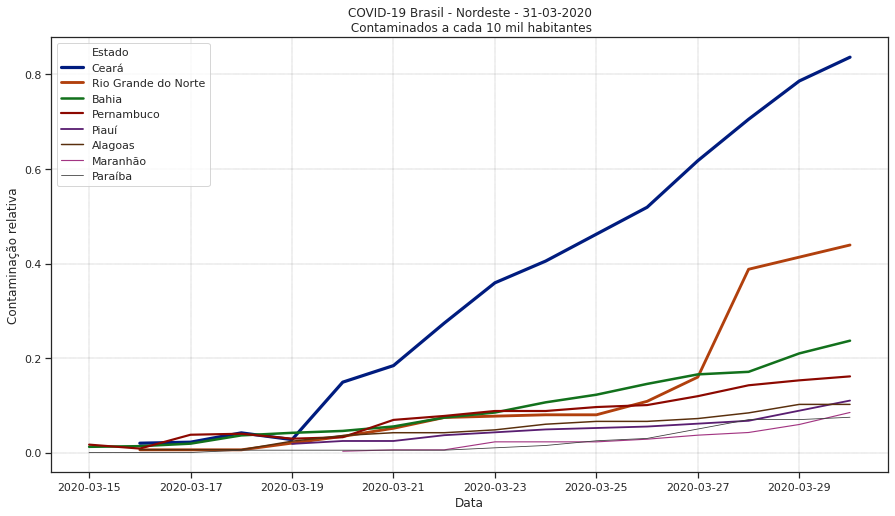

In [123]:
#hide_input
#nordeste relativa
nordeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Nordeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/23_brasil_curva_relativa.png",bbox_inches = 'tight')

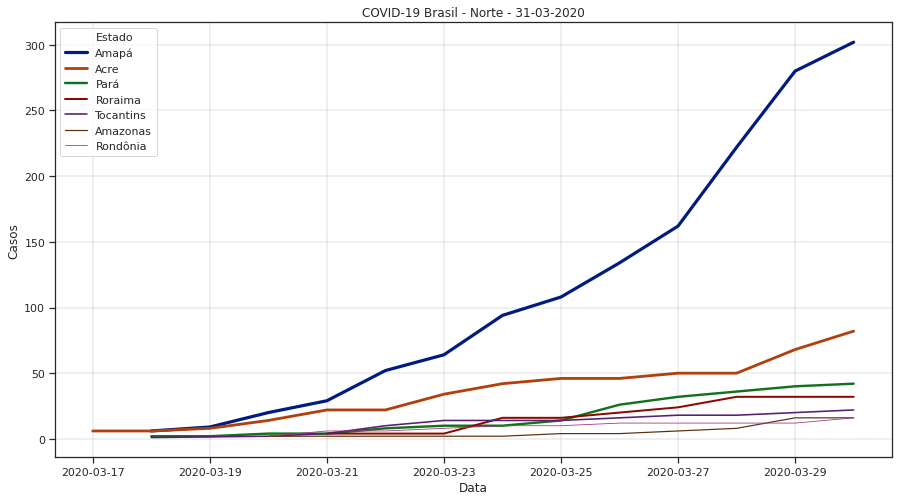

In [124]:
#hide_input
#norte absoluta
norte.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Norte - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/24_norte_absoluta.png",bbox_inches = 'tight')

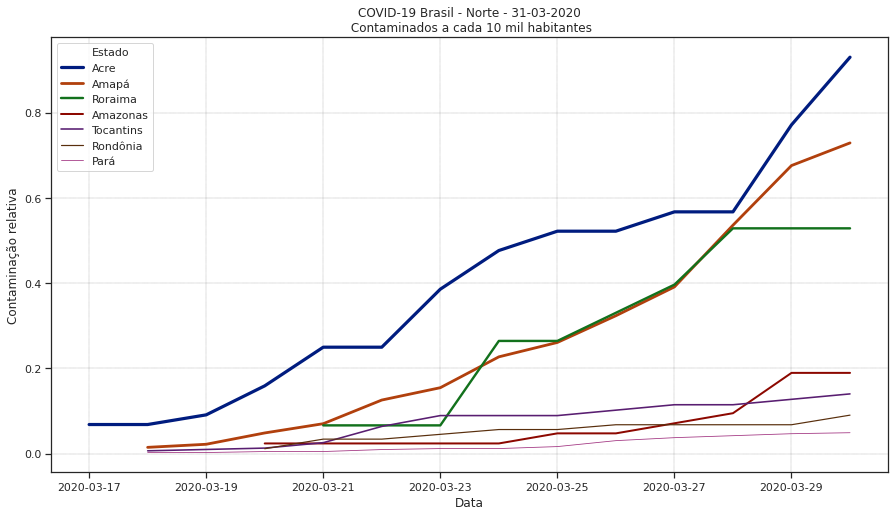

In [125]:
#hide_input
#norte relativa
norte.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Norte - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/25_norte_relativa.png",bbox_inches = 'tight')

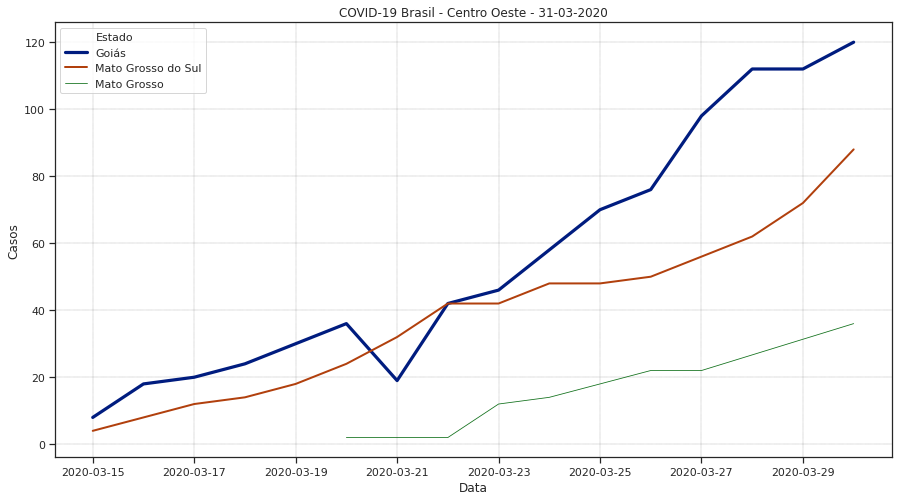

In [126]:
#hide_input
#centroste absoluta
centroeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Centro Oeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/26_centroeste_absoluta.png",bbox_inches = 'tight')

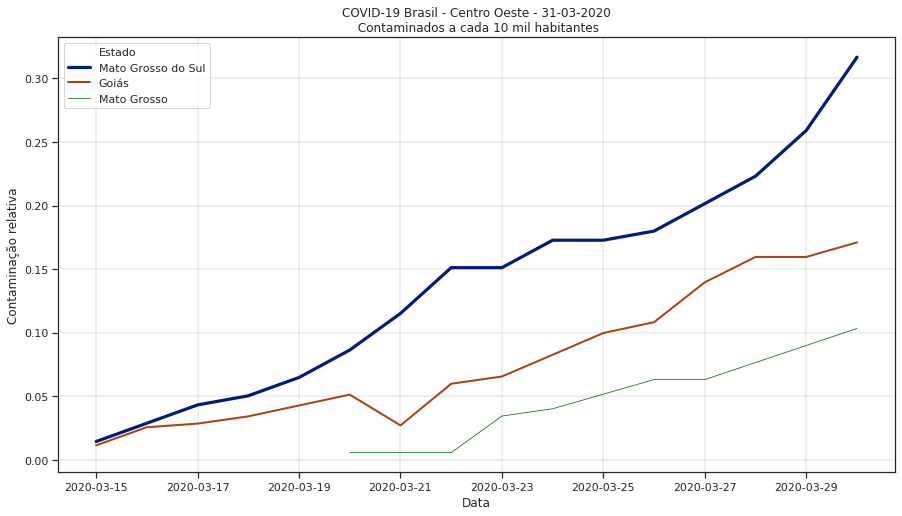

In [127]:
#hide_input
#centroeste relativa
centroeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

In [128]:
#hide
fig = px.line(centroeste, x="Dia",y='Relativa',color='Estado',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros",)    
fig.show()

In [129]:
#hide

x = sudeste.drop(['Mortes','População','Relativa'],axis=1)

x
y = x.shift(1, freq='D')
y.tail(5)
teste = pd.concat((x,y),axis=0,ignore_index=True)
teste.head(5)

KeyError: ignored

In [0]:
#hide


In [0]:
#hide



In [130]:
#hide
# individual states (optional)
x = casos_mar5[casos_mar5['Estado']=='Paraná']
x = x.drop(['Mortes','população','Relativa'],axis=1)
x = x.set_index('Dia')
x
y = x.shift(3, freq='D')
y
x['Shifted'] = y['Casos']
x

,Estado,Casos,Shifted
Dia,,,
2020-03-30,Paraná,320,250.0
2020-03-29,Paraná,304,212.0
2020-03-28,Paraná,274,194.0
2020-03-27,Paraná,250,140.0
2020-03-26,Paraná,212,120.0
2020-03-25,Paraná,194,108.0
2020-03-24,Paraná,140,86.0
2020-03-23,Paraná,120,72.0
2020-03-22,Paraná,108,46.0


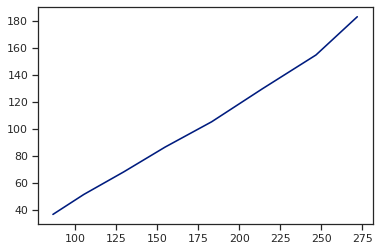

In [131]:
#hide
plt.plot(x['Casos'].rolling(5).mean(),x['Shifted'].rolling(5).mean())


In [0]:
#hide
casos_mar5.columns
casos_mar5['Dia']=  pd.to_datetime(casos_mar5['Dia'])
casos_mar5.set_index('Dia',inplace=True)

In [133]:
#hide
#hide
casos_mar5.index

DatetimeIndex(['2020-03-30', '2020-03-29', '2020-03-28', '2020-03-27',
               '2020-03-26', '2020-03-25', '2020-03-24', '2020-03-30',
               '2020-03-23', '2020-03-30',
               ...
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-20', '2020-03-18', '2020-03-19', '2020-03-15',
               '2020-03-16', '2020-03-17'],
              dtype='datetime64[ns]', name='Dia', length=361, freq=None)

In [134]:
#hide
import plotly.express as px

fig = px.bar(casos_mar5, x="Estado", y="Casos", color="Estado",
  animation_frame=casos_mar5.index, range_y=[0,4000])
fig.show()
#fig.update_layout( yaxis_type="log")



#fig.write_html("plots/11_letalidade.html")

ValueError: ignored

In [0]:
#hide
fig = px.line(sudeste, x="Dia",y='Relativa',color='Estado',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros")    
fig.show()

In [0]:
#hide
sudeste['Dia'] = sudeste['Dia'].dt.strftime('%Y-%m-%d')


In [0]:
#hide
sudeste.set_index('Dia',inplace=True)


In [0]:
#hide
sudeste = sudeste.sort_index(ascending=True)



In [138]:
#hide
sudeste

,Estado,Casos,Mortes,população,Relativa
Dia,,,,,
2020-03-15,Rio de Janeiro,48,0.0,17264943,0.027802
2020-03-16,Minas Gerais,12,0.0,21168791,0.005669
2020-03-16,Rio de Janeiro,50,0.0,17264943,0.028960
2020-03-16,São Paulo,304,0.0,45919049,0.066203
2020-03-17,São Paulo,328,2.0,45919049,0.071430
2020-03-17,Minas Gerais,28,0.0,21168791,0.013227
2020-03-18,Minas Gerais,38,0.0,21168791,0.017951
2020-03-18,Rio de Janeiro,126,0.0,17264943,0.072980
2020-03-18,São Paulo,480,3.0,45919049,0.104532


In [139]:
#hide

fig = px.bar(sudeste, x="Casos", y="Estado", color="Estado",orientation='h',
             animation_frame='Dia', animation_group='Estado', range_x=[0,1000])
fig.show()

ValueError: ignored

In [0]:
#hide
casos_por_estado['date'] = casos_por_estado['date'].dt.strftime('%Y-%m-%d')


In [141]:
#hide
fig = px.bar(casos_por_estado, x="confirmed", y="state", color="state",orientation='h',
             animation_frame='date', animation_group='state', range_x=[0,1000])
fig.show()

In [142]:
#hide
casos.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'city_ibge_code', 'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [143]:
#hide
sampa_meo = casos[casos['city']=='São Paulo']
sampa_meo= sampa_meo.sort_values('date',ascending=True)
sampa_meo['cumulativo'] = sampa_meo['confirmed'].cumsum()

sampa_meo

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,cumulativo
1762,2020-02-26,SP,São Paulo,city,1,NaN,1,False,12252023.0,3550308.0,0.00816,NaN,1
1761,2020-02-27,SP,São Paulo,city,1,NaN,2,False,12252023.0,3550308.0,0.00816,NaN,2
1760,2020-02-28,SP,São Paulo,city,2,NaN,3,False,12252023.0,3550308.0,0.01632,NaN,4
1759,2020-02-29,SP,São Paulo,city,2,NaN,4,False,12252023.0,3550308.0,0.01632,NaN,6
1758,2020-03-01,SP,São Paulo,city,2,NaN,5,False,12252023.0,3550308.0,0.01632,NaN,8
1757,2020-03-02,SP,São Paulo,city,2,NaN,6,False,12252023.0,3550308.0,0.01632,NaN,10
1756,2020-03-03,SP,São Paulo,city,2,NaN,7,False,12252023.0,3550308.0,0.01632,NaN,12
1755,2020-03-04,SP,São Paulo,city,3,NaN,8,False,12252023.0,3550308.0,0.02449,NaN,15
1754,2020-03-05,SP,São Paulo,city,6,NaN,9,False,12252023.0,3550308.0,0.04897,NaN,21
1753,2020-03-07,SP,São Paulo,city,12,NaN,10,False,12252023.0,3550308.0,0.09794,NaN,33


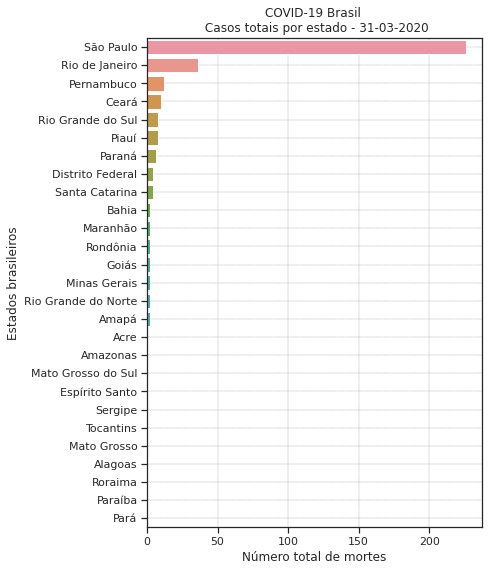

In [144]:
#hide
# absolute approach bar plot
df_last.sort_values('deaths',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['deaths'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de mortes')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

In [0]:
#hide
casos_mar5.sort_values('Mortes',ascending=False,inplace=True)

hue = casos_mar5['Estado'].unique()

In [146]:
#hide
#hide
#Relativa approach line plot

plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=casos_mar5,hue='Estado',size="Estado",hue_order=hue)
plt.title('COVID-19 Brasil \n Mortes por estado  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
#plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

ValueError: ignored

<Figure size 1080x576 with 0 Axes>

In [0]:
#hide


In [0]:
#hide
